## Task 1: Load and Explore the Dataset

In [1]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

# Load Iris dataset
iris = load_iris()
X = iris.data[:, :2] 
y = iris.target

# Keep only Setosa (0) and Versicolor (1)
mask = y < 2
X = X[mask]
y = y[mask]

print("Shape of X:", X.shape)
print("Class distribution:", np.bincount(y))

# Create DataFrame for better visualization
df = pd.DataFrame(X, columns=["Sepal Length", "Sepal Width"])
df["Class"] = y
df.head()


Shape of X: (100, 2)
Class distribution: [50 50]


,Sepal Length,Sepal Width,Class
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


### Task 2: Visualize the Dataset

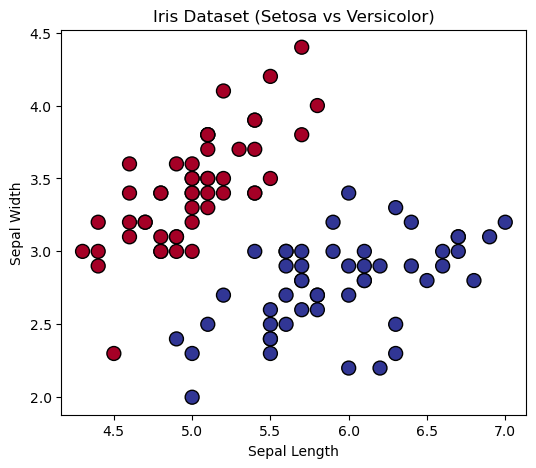

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", s=100, cmap=plt.cm.RdYlBu)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Iris Dataset (Setosa vs Versicolor)")
plt.show()


### Task 3: Train a Basic KNN Model (k = 3)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1) Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [4]:
# 2) Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# 3) Fit KNN (k=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [14]:
# 4) Make predictions
y_pred = knn.predict(X_test_scaled)
print("predicted values:",y_pred)
print("Actual values:   ",y_test)

predicted values: [0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0]
Actual values:    [0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0]


In [7]:
# 5) Check accuracy
train_acc = knn.score(X_train_scaled, y_train)
test_acc = knn.score(X_test_scaled, y_test)
print(f"Train Accuracy: {train_acc:.2f}, Test Accuracy: {test_acc:.2f}")

Train Accuracy: 0.99, Test Accuracy: 1.00


### Task 4: Predictions for Different Values of k

In [8]:
k_values = [1, 3, 5, 7, 9]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    
    print(f"Accuracy for k={k}: {acc:.2f}")

Accuracy for k=1: 1.00
Accuracy for k=3: 1.00
Accuracy for k=5: 1.00
Accuracy for k=7: 1.00
Accuracy for k=9: 1.00


### Task 5: Decision Boundary Function

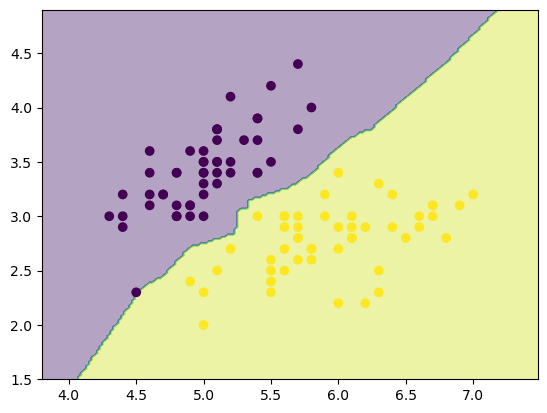

In [15]:
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

xx, yy = np.meshgrid(
    np.arange(X[:,0].min()-0.5, X[:,0].max()+0.5, 0.02),
    np.arange(X[:,1].min()-0.5, X[:,1].max()+0.5, 0.02)
)

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

### Task 6: Decision Boundary for Different Values of k

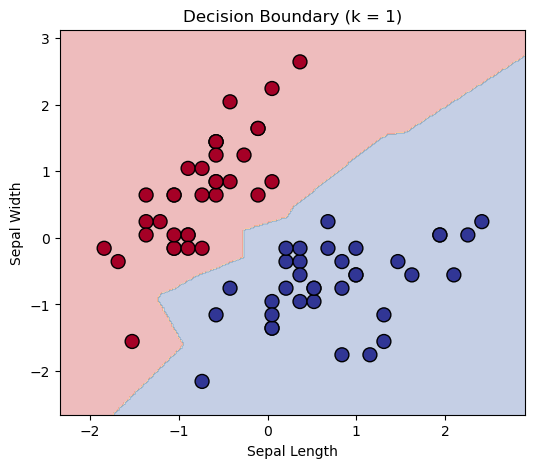

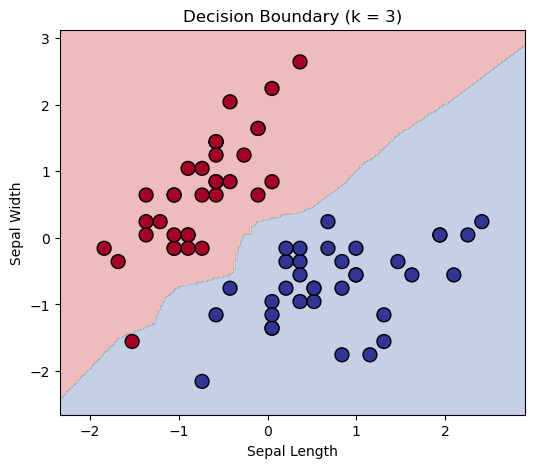

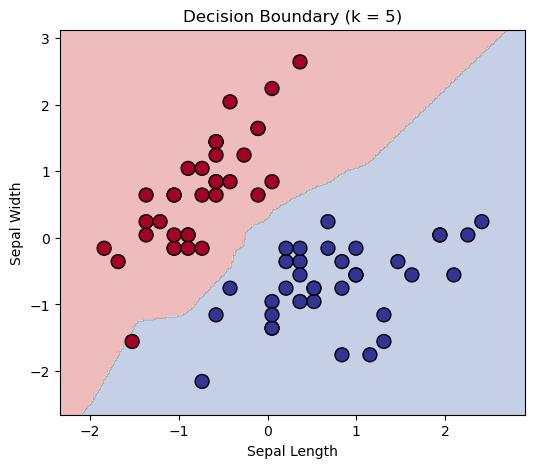

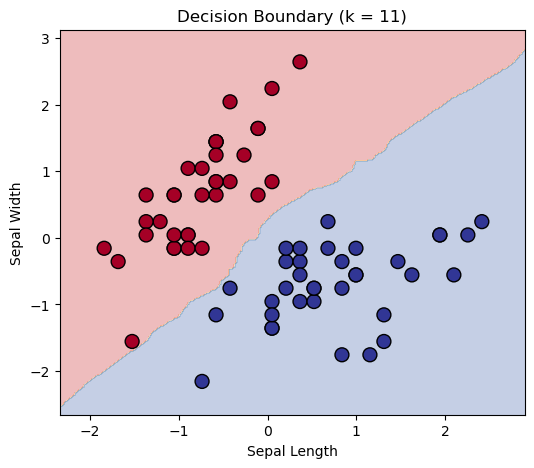

In [16]:
for k in [1, 3, 5, 11]:
    model = KNeighborsClassifier(n_neighbors=k, p=2)  # Euclidean
    model.fit(X_train_scaled, y_train)
    plot_decision_boundary(model, X_train_scaled, y_train, title=f"Decision Boundary (k = {k})")

### Task 7: Effect of Distance Metric

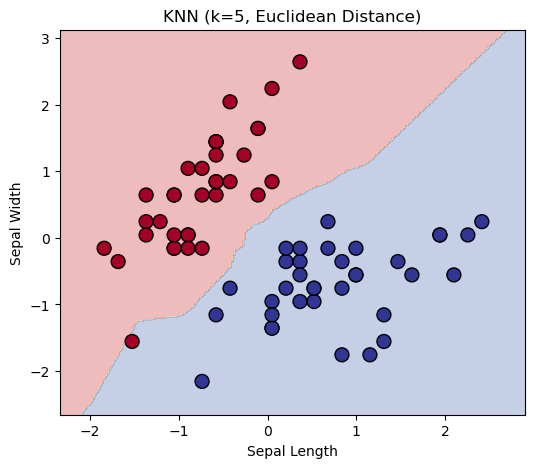

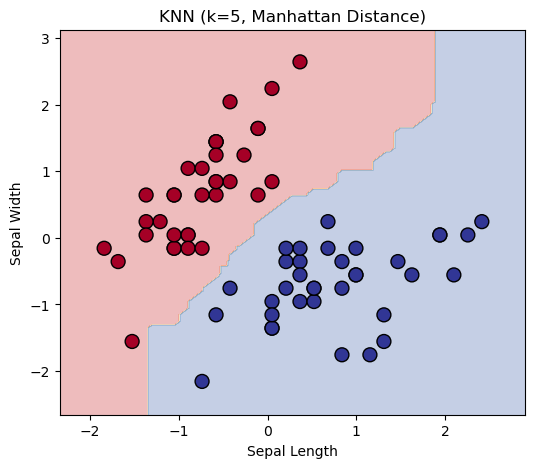

In [17]:
# Fix k = 5
# Euclidean distance (p=2)
knn_euclidean = KNeighborsClassifier(n_neighbors=5, p=2)
knn_euclidean.fit(X_train_scaled, y_train)
plot_decision_boundary(knn_euclidean, X_train_scaled, y_train, title="KNN (k=5, Euclidean Distance)")

# Manhattan distance (p=1)
knn_manhattan = KNeighborsClassifier(n_neighbors=5, p=1)
knn_manhattan.fit(X_train_scaled, y_train)
plot_decision_boundary(knn_manhattan, X_train_scaled, y_train, title="KNN (k=5, Manhattan Distance)")


In [18]:
for m in ['euclidean', 'manhattan', 'minkowski']:
    knn = KNeighborsClassifier(n_neighbors=5, metric=m)
    knn.fit(X_train, y_train)
    print(m, accuracy_score(y_test, knn.predict(X_test)))

euclidean 1.0
manhattan 1.0
minkowski 1.0


### Task 8: Observations

#### 1. How do predictions change as k increases?
- When k is small, predictions change a lot because the model depends on very few points, making the boundary jagged and sensitive to noise.
As k increases, predictions become more stable and smooth because more neighbors are considered, leading to better generalization.

#### 2. Which k value gives the most complex decision boundary?
- k = 1 gives the most complex decision boundary because each data point affects the prediction separately, resulting in a jagged, highly flexible boundary.

####. Why does k = 1 behave differently?

For k = 1, the prediction depends on only the nearest neighbor. This makes the model very sensitive to noise and small variations in the data, causing overfitting.

4. How does the distance metric affect results?

The distance metric determines which points are considered nearest. Different metrics (Euclidean, Manhattan, etc.) can select different neighbors, which slightly changes predictions and the shape of the decision boundary.

5. Which configuration would you choose and why?

I would choose a moderate k value, like k = 5, with Euclidean distance.
This configuration balances flexibility and generalization, produces a smooth decision boundary, and avoids overfitting while maintaining good accuracy.